In [3]:
# At the beginning of the process, we need to scrapping the data from Twitter through it's API 
# by package Tweepy

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 15 02:45:39 2018
@author: ILOOKFORME102
"""
import tweepy
import csv
from tweepy import OAuthHandler

consumer_key = 'HcfzNWaWkDSSrSKkWSSzk6SIH'
consumer_secret = '2KUAvtpRu4dzjilbpWhkCrEUAly71WQvFhj2ptjqgURYWEqjp1'
access_token = '715066304848338944-4JZgsQ3KeWfo2oncG1B3q4XzgpjXJDY'
access_token_secret = 'PZrCebFpZo7IgdKd0FDqQqTxSeCLIISyOiX5v3vBGhWEr'

tweet_name = "realDonaldTrump"
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method

    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    alltweets = []  

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(id = screen_name,count=200)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print('getting tweets before {}'.format(oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print ("...{} tweets downloaded so far".format(len(alltweets)))

    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id,len(tweet.text),tweet.text, tweet.created_at,tweet.source, tweet.favorite_count,tweet.retweet_count] for tweet in alltweets]

    #write the csv  
    with open('{}_tweets.csv'.format(screen_name), 'wt') as f:
        writer = csv.writer(f)
        writer.writerow(["ID","Length","Tweets","Date","Source","Likes","Retweets"])
        writer.writerows(outtweets)

    pass
if __name__ == '__main__':
	get_all_tweets(tweet_name)


getting tweets before 1106987911185162244
...400 tweets downloaded so far
getting tweets before 1102002565116542975
...600 tweets downloaded so far
getting tweets before 1094714204328771585
...800 tweets downloaded so far
getting tweets before 1086987568074424319
...1000 tweets downloaded so far
getting tweets before 1080616636363743233
...1200 tweets downloaded so far
getting tweets before 1073210823936495616
...1399 tweets downloaded so far
getting tweets before 1065225940836458495
...1599 tweets downloaded so far
getting tweets before 1058825551090237440
...1799 tweets downloaded so far
getting tweets before 1052888451199262724
...1998 tweets downloaded so far
getting tweets before 1047156358343282687
...2196 tweets downloaded so far
getting tweets before 1040563888125894655
...2392 tweets downloaded so far
getting tweets before 1034990940593823745
...2592 tweets downloaded so far
getting tweets before 1029332350969237503
...2792 tweets downloaded so far
getting tweets before 102293

In [6]:
# Next step is doing data visualization and some statistics on the data we have:

In [3]:
import numpy as np
import pandas as pd
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [4]:
# Read the csv data file by pandas:
data = pd.read_csv('realDonaldTrump_tweets.csv',encoding="utf-8")
data = data.assign(Date=pd.to_datetime(data.Date)).drop('ID', axis='columns')
data['Date'] = pd.to_datetime(data['Date'], format='%y-%m-%d %H:%M:%S')
dataT = data['Date']

In [5]:
# Let's take an overview of data:
data.head(10)

,Length,Tweets,Date,Source,Likes,Retweets
0,140,The First Step Act proves that our Country can...,2019-04-03 17:09:19,Twitter for iPhone,66584,17444
1,140,Congress must get together and immediately eli...,2019-04-03 13:45:03,Twitter for iPhone,88367,22880
2,140,...This will be a great campaign issue. I neve...,2019-04-03 13:37:14,Twitter for iPhone,60627,15416
3,139,I was never planning a vote prior to the 2020 ...,2019-04-03 13:26:53,Twitter for iPhone,92488,20834
4,124,"Today, it was my great honor to welcome @NATO ...",2019-04-02 19:59:57,Twitter for iPhone,44017,9603
5,140,"Today, we celebrate the tremendous accomplishm...",2019-04-02 19:42:48,Twitter for iPhone,59116,14176
6,140,“I haven’t seen any Democrats down here at the...,2019-04-02 14:52:09,Twitter for iPhone,116937,34460
7,23,https://t.co/jVIodsTNNH,2019-04-02 14:51:17,Twitter Media Studio,37450,11708
8,140,"After many years (decades), Mexico is apprehen...",2019-04-02 14:41:50,Twitter for iPhone,96701,24188
9,140,There is no amount of testimony or document pr...,2019-04-02 12:54:11,Twitter for iPhone,88366,21057


In [6]:
# Visualization for Donald Trump's tweets distribution:

In [7]:
trace = go.Histogram(
    x=dataT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title="Donald Trump's Tweets Distribution",
    height=450,
    width=1200, 
    xaxis=dict(
        title='Time'
    ),
    yaxis=dict(
        title='Number of Tweets'
    ),
    bargap=0.3,
)

data_trace = [trace]

fig = go.Figure(data=data_trace, layout=layout)
plot(fig)

 

'file:///Users/macbook/workspace/Python/thesis/temp-plot.html'

In [8]:
# Some basic statistic for the lenght of tweet
mean_length = np.mean(data['Length']) 
print("Average length of tweets: \n {}".format(mean_length))
max_like = np.max(data['Likes'])
max_retweet = np.max(data['Retweets'])

#Print out the tweets which has the most likes and retweets:
max_like_index = data[data.Likes == max_like].index[0]
max_retweet_index  = data[data.Retweets == max_retweet].index[0]

# Max likes:
print("Most favorite tweet by number of likes: \n{}".format(data['Tweets'][max_like_index]))
print("Number of likes: {}".format(max_like))
print("{} characters.\n".format(data['Length'][max_like_index]))

# Max retweets:
print("Most favorite tweet by number of retweets: \n{}".format(data['Tweets'][max_retweet_index]))
print("Number of retweets: {}".format(max_retweet))
print("{} characters.\n".format(data['Length'][max_retweet_index]))


#time series tracking the change of likes,retweets and the length of tweet 

len_by_time = pd.Series(data=data['Length'].values, index=data['Date'])
likes_by_time = pd.Series(data=data['Likes'].values, index=data['Date'])
retweets_by_time = pd.Series(data=data['Retweets'].values, index=data['Date'])

#visualization 

len_by_time.plot(figsize=(16,4), label="Length", legend=True, color='r')
# visualizing the time series of number of likes and retweets 
likes_by_time.plot(figsize=(16,4), label="Likes", legend=True,color='g')
retweets_by_time.plot(figsize=(16,4), label="Retweets", legend=True,color='b');

Average length of tweets: 
 121.61764705882354
Most favorite tweet by number of likes: 
Merry Christmas!
Number of likes: 498558
16 characters.

Most favorite tweet by number of retweets: 
RT @realDonaldTrump: They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of retweets: 118104
86 characters.



In [9]:
# Sentiment Analysis for the tweet data
# package used: textblob
from textblob import TextBlob
import re
import string

In [10]:
def clean_data(tweet): 
    # using regex to clean the text by removing the link from text
    tweet = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ",tweet)
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
	#Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
	#Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
	#Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
	#Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
	#trim
    tweet = tweet.strip('\'"')
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    return tweet
data['clean_tweet'] = data.Tweets.apply(clean_data)
def sentiment_tweets(tweet):
    model = TextBlob(tweet)
    if model.sentiment.polarity > 0:
        return 1
    elif model.sentiment.polarity == 0:
        return 0
    else:
        return -1

data['Sentiment']= np.array([sentiment_tweets(tweet) for tweet in data['clean_tweet']])
display(data.head(10))

#anlysing the result of sentiment analysis:
pos_tweets = [ tweet for index, tweet in enumerate(data['clean_tweet']) if data['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['clean_tweet']) if data['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['clean_tweet']) if data['Sentiment'][index] < 0]

print("percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['clean_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['clean_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['clean_tweet'])))


,Length,Tweets,Date,Source,Likes,Retweets,clean_tweet,Sentiment
0,140,The First Step Act proves that our Country can...,2019-04-03 17:09:19,Twitter for iPhone,66584,17444,the first step act proves that our country can...,1
1,140,Congress must get together and immediately eli...,2019-04-03 13:45:03,Twitter for iPhone,88367,22880,congress must get together and immediately eli...,1
2,140,...This will be a great campaign issue. I neve...,2019-04-03 13:37:14,Twitter for iPhone,60627,15416,this will great campaign issue never asked mit...,1
3,139,I was never planning a vote prior to the 2020 ...,2019-04-03 13:26:53,Twitter for iPhone,92488,20834,was never planning vote prior the 2020 electio...,1
4,124,"Today, it was my great honor to welcome @NATO ...",2019-04-02 19:59:57,Twitter for iPhone,44017,9603,today was great honor welcome nato secretary g...,1
5,140,"Today, we celebrate the tremendous accomplishm...",2019-04-02 19:42:48,Twitter for iPhone,59116,14176,today celebrate the tremendous accomplishments...,1
6,140,“I haven’t seen any Democrats down here at the...,2019-04-02 14:52:09,Twitter for iPhone,116937,34460,haven seen any democrats down here the border ...,-1
7,23,https://t.co/jVIodsTNNH,2019-04-02 14:51:17,Twitter Media Studio,37450,11708,,0
8,140,"After many years (decades), Mexico is apprehen...",2019-04-02 14:41:50,Twitter for iPhone,96701,24188,after many years decades mexico apprehending l...,1
9,140,There is no amount of testimony or document pr...,2019-04-02 12:54:11,Twitter for iPhone,88366,21057,there amount testimony document production tha...,0


percentage of positive tweets: 51.036096256684495%
Percentage of neutral tweets: 30.84893048128342%
Percentage de negative tweets: 18.114973262032084%


In [11]:
#Topic Modeling for tweet data

In [12]:
from gensim import corpora, models, similarities
import warnings
warnings.filterwarnings("ignore")

In [13]:
#Create the corpus of text data

In [14]:
corpus = []


In [15]:
for tweet in data["clean_tweet"]:
    corpus.append(tweet)
print(corpus[1:40])

['congress must get together and immediately eliminate the loopholes the border action border large', 'this will great campaign issue never asked mitch mcconnell for vote before the election has been', 'was never planning vote prior the 2020 election the wonderful healthcare package that some very talented', 'today was great honor welcome nato secretary general jensstoltenberg the whitehouse', 'today celebrate the tremendous accomplishments americans with asd and reaffirm our commitment work togeth', 'haven seen any democrats down here the border working with asking speak any they have', '', 'after many years decades mexico apprehending large numbers people their southern border mostly from', 'there amount testimony document production that can satisfy jerry nadler shifty adam schiff', 'robert mueller was god like figure the democrats until ruled collusion the long awaited 000 000', 'world autism awareness day 2019 significance history and theme via httweets', '1998 rep jerry nadler st

In [16]:
# Necessary package for Topic Modeling

In [17]:
import nltk   
import gensim
import logging
import tempfile
import os
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
#from command line run: python -m nltk.downloader stopwords

from nltk.corpus import stopwords
from string import punctuation


Folder "/var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T" will be used to save temporary dictionary and corpus.


In [18]:
#cleaning da
# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
# store the Trump dictionary
dictionary.save(os.path.join(TEMP_FOLDER, 'trump.dict'))
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'trump.mm'), corpus)

2019-05-02 14:16:13,801 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-05-02 14:16:13,859 : INFO : built Dictionary(6073 unique tokens: ['achieve', 'act', 'amazing', 'aside', 'breakthroughs']...) from 2992 documents (total 28511 corpus positions)
2019-05-02 14:16:13,860 : INFO : saving Dictionary object under /var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T/trump.dict, separately None
2019-05-02 14:16:13,865 : INFO : saved /var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T/trump.dict
2019-05-02 14:16:13,909 : INFO : storing corpus in Matrix Market format to /var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T/trump.mm
2019-05-02 14:16:13,911 : INFO : saving sparse matrix to /var/folders/m_/j0tcz1vn06q4ndgrzrp_yxpm0000gn/T/trump.mm
2019-05-02 14:16:13,914 : INFO : PROGRESS: saving document #0
2019-05-02 14:16:13,954 : INFO : PROGRESS: saving document #1000
2019-05-02 14:16:13,978 : INFO : PROGRESS: saving document #2000
2019-05-02 14:16:14,009 : INFO : saved 2992x6073 mat

In [19]:

from gensim import corpora, models, similarities

tfidf_md = models.TfidfModel(corpus)
corpus_tfidf_md = tfidf_md[corpus]

2019-05-02 14:16:25,666 : INFO : collecting document frequencies
2019-05-02 14:16:25,668 : INFO : PROGRESS: processing document #0
2019-05-02 14:16:25,681 : INFO : calculating IDF weights for 2992 documents and 6072 features (27963 matrix non-zeros)


In [52]:

#main part of LDA topic modeling:
number_topics = 5
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=number_topics)
corpus_lda = lda_model[corpus_tfidf_md]
#Show first n important word in the topics:
lda_model.show_topics(number_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(number_topics)}

2019-05-03 12:39:30,589 : INFO : using symmetric alpha at 0.2
2019-05-03 12:39:30,590 : INFO : using symmetric eta at 0.2
2019-05-03 12:39:30,594 : INFO : using serial LDA version on this node
2019-05-03 12:39:30,600 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 2992 documents, updating model once every 2000 documents, evaluating perplexity every 2992 documents, iterating 50x with a convergence threshold of 0.001000
2019-05-03 12:39:30,601 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-05-03 12:39:30,602 : INFO : PROGRESS: pass 0, at document #2000/2992
2019-05-03 12:39:31,757 : INFO : merging changes from 2000 documents into a model of 2992 documents
2019-05-03 12:39:31,764 : INFO : topic #0 (0.200): 0.028*"great" + 0.012*"thank" + 0.012*"border" + 0.008*"america" + 0.008*"president" + 0.007*"realdonaldtrump" + 0.007*"get" + 0.006*"people" + 0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instea

In [51]:
print(lda_model.print_topics())


2019-05-03 12:38:36,263 : INFO : topic #0 (0.200): 0.010*"realdonaldtrump" + 0.009*"great" + 0.006*"trump" + 0.006*"united" + 0.006*"many" + 0.006*"president" + 0.006*"years" + 0.005*"big" + 0.005*"good" + 0.005*"trade"
2019-05-03 12:38:36,266 : INFO : topic #1 (0.200): 0.016*"great" + 0.007*"realdonaldtrump" + 0.006*"people" + 0.005*"democrats" + 0.005*"vote" + 0.005*"president" + 0.004*"crime" + 0.004*"night" + 0.004*"wall" + 0.004*"fake"
2019-05-03 12:38:36,268 : INFO : topic #2 (0.200): 0.010*"fbi" + 0.009*"trump" + 0.008*"people" + 0.007*"thank" + 0.007*"great" + 0.005*"russia" + 0.005*"president" + 0.005*"house" + 0.005*"would" + 0.005*"get"
2019-05-03 12:38:36,269 : INFO : topic #3 (0.200): 0.016*"great" + 0.011*"america" + 0.010*"president" + 0.009*"thank" + 0.008*"trump" + 0.006*"realdonaldtrump" + 0.006*"florence" + 0.006*"hillary" + 0.006*"make" + 0.005*"running"
2019-05-03 12:38:36,270 : INFO : topic #4 (0.200): 0.014*"great" + 0.012*"president" + 0.012*"trump" + 0.009*"new

[(0, '0.010*"realdonaldtrump" + 0.009*"great" + 0.006*"trump" + 0.006*"united" + 0.006*"many" + 0.006*"president" + 0.006*"years" + 0.005*"big" + 0.005*"good" + 0.005*"trade"'), (1, '0.016*"great" + 0.007*"realdonaldtrump" + 0.006*"people" + 0.005*"democrats" + 0.005*"vote" + 0.005*"president" + 0.004*"crime" + 0.004*"night" + 0.004*"wall" + 0.004*"fake"'), (2, '0.010*"fbi" + 0.009*"trump" + 0.008*"people" + 0.007*"thank" + 0.007*"great" + 0.005*"russia" + 0.005*"president" + 0.005*"house" + 0.005*"would" + 0.005*"get"'), (3, '0.016*"great" + 0.011*"america" + 0.010*"president" + 0.009*"thank" + 0.008*"trump" + 0.006*"realdonaldtrump" + 0.006*"florence" + 0.006*"hillary" + 0.006*"make" + 0.005*"running"'), (4, '0.014*"great" + 0.012*"president" + 0.012*"trump" + 0.009*"new" + 0.007*"time" + 0.007*"people" + 0.007*"border" + 0.006*"american" + 0.005*"today" + 0.005*"troy"')]


5


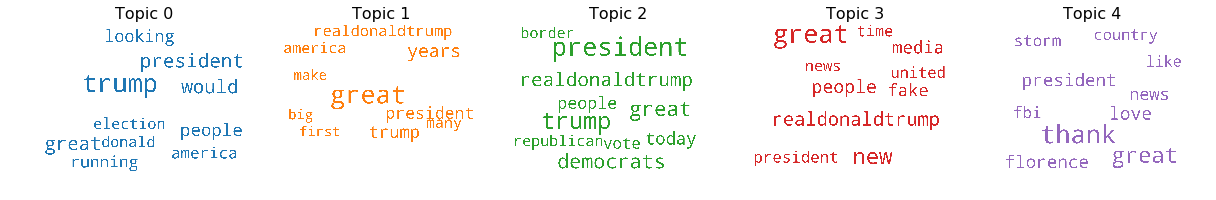

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stoplist,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(17,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [21]:
#data_lda

import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(80, 5)
(5, 80)


,000,america,american,big,border,china,collusion,country,crime,day,...,union,united,vote,way,win,working,would,year,years,york
0,0.000000,0.004721,0.000000,0.003367,0.000000,0.000000,0.000000,0.000000,0.000000,0.003074,...,0.000000,0.000000,0.000000,0.003914,0.000000,0.000000,0.006858,0.000000,0.000000,0.000000
1,0.000000,0.006296,0.000000,0.005177,0.000000,0.004568,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009095,0.000000
2,0.000000,0.003686,0.000000,0.003686,0.004328,0.000000,0.003559,0.003299,0.000000,0.000000,...,0.000000,0.000000,0.004387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004410,0.004028,0.000000,...,0.000000,0.004989,0.000000,0.000000,0.003363,0.000000,0.003624,0.004512,0.000000,0.004042
4,0.003768,0.000000,0.002845,0.000000,0.003633,0.000000,0.000000,0.004226,0.000000,0.000000,...,0.003848,0.000000,0.000000,0.000000,0.000000,0.003939,0.000000,0.000000,0.000000,0.000000


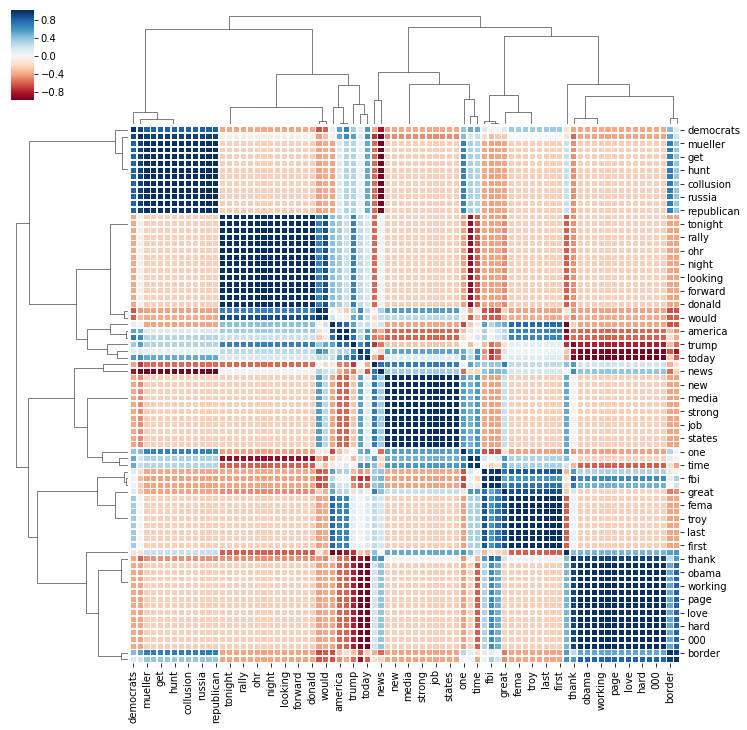

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [25]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda_model, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
4     -48.527676  -62.017574       1        1  52.797001
3      -0.474870 -141.187119       2        1  17.025702
1      95.159370 -131.874084       3        1  10.114225
2       3.863364   18.529943       4        1  10.057177
0      74.981880  -41.212006       5        1  10.005895, topic_info=     Category       Freq             Term      Total  loglift  logprob
24    Default  33.000000            great  33.000000  30.0000  30.0000
117   Default  15.000000            trump  15.000000  29.0000  29.0000
113   Default  19.000000        president  19.000000  28.0000  28.0000
187   Default   8.000000              new   8.000000  27.0000  27.0000
67    Default   4.000000            years   4.000000  26.0000  26.0000
193   Default  14.000000  realdonaldtrump  14.000000  25.0000  25.0000
4710  Default   9.000000         florence   9.000000  24.0000  24.0000
150   Default   6.000000          america   6.000000  23.0000  23.0000
65    Default  11.000000           people  11.000000  22.0000  22.0000
55    Default   8.000000        democrats   8.000000  21.0000  21.0000
146   Default   7.000000            would   7.000000  20.0000  20.0000
615   Default   6.000000             time   6.000000  19.0000  19.0000
364   Default  11.000000             fake  11.000000  18.0000  18.0000
42    Default   9.000000            today   9.000000  17.0000  17.0000
372   Default   7.000000              big   7.000000  16.0000  16.0000
181   Default   4.000000             make   4.000000  15.0000  15.0000
366   Default   8.000000            media   8.000000  14.0000  14.0000
61    Default   9.000000             many   9.000000  13.0000  13.0000
572   Default   4.000000          looking   4.000000  12.0000  12.0000
23    Default   3.000000         election   3.000000  11.0000  11.0000
375   Default   4.000000            rally   4.000000  10.0000  10.0000
677   Default   2.000000          running   2.000000   9.0000   9.0000
6     Default   6.000000            first   6.000000   8.0000   8.0000
131   Default   5.000000              job   5.000000   7.0000   7.0000
1725  Default   5.000000             fema   5.000000   6.0000   6.0000
442   Default   5.000000             good   5.000000   5.0000   5.0000
351   Default  10.000000              fbi  10.000000   4.0000   4.0000
297   Default   3.000000             maga   3.000000   3.0000   3.0000
368   Default  13.000000             news  13.000000   2.0000   2.0000
322   Default   6.000000       republican   6.000000   1.0000   1.0000
...       ...        ...              ...        ...      ...      ...
249    Topic5   0.891326             soon   1.705679   1.6530  -5.8167
182    Topic5   1.171900              way   2.576475   1.5142  -5.5431
117    Topic5   4.054890            trump  15.813841   0.9410  -4.3018
110    Topic5   1.274166           donald   2.959473   1.4593  -5.4594
1341   Topic5   1.012760              ohr   2.326159   1.4705  -5.6890
1866   Topic5   1.209049            north   3.081764   1.3663  -5.5119
146    Topic5   2.053246            would   7.206569   1.0464  -4.9823
572    Topic5   1.572711          looking   4.865955   1.1725  -5.2489
23     Topic5   1.274559         election   3.965991   1.1668  -5.4591
1763   Topic5   0.559333      interviewed   0.971653   1.7497  -6.2827
1335   Topic5   0.835953            bruce   1.993745   1.4328  -5.8809
297    Topic5   1.139249             maga   3.798640   1.0977  -5.5713
804    Topic5   0.879110              say   2.574552   1.2275  -5.8305
150    Topic5   1.413457          america   6.839665   0.7253  -5.3557
65     Topic5   1.707738           people  11.130337   0.4275  -5.1665
375    Topic5   1.100974            rally   4.332765   0.9320  -5.6055
113    Topic5   2.137691        president  19.507067   0.0909  -4.9420
925    Topic5   1.010113            night   3.659004   1.0149  -5.6916
305    T